# Hashtag word clouds - General Covid-19 dataset

In order to create the word clouds, we need the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt
from matplotlib.colors import ListedColormap

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Terms regarding Covid

We have filtered all the hashtags:

In [3]:
index_covid=0
cmt_list_covid = []
for element in data:
    for entity in data[index_covid]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        token_covid=entity['text']
        cmt_list_covid.append(token_covid)
        
    index_covid=index_covid+1

We have calculated the frequency distribution, displayed in the form of a bar chart showing the 15 most frequent hashtags within the dataset:

In [4]:
#fdist_covid = dict(nltk.FreqDist(cmt_list_covid))
#fdist_sorted = dict(sorted(fdist_covid.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
#out = dict(itertools.islice(fdist_sorted.items(), 15))
out = dict(nltk.FreqDist(cmt_list_covid))

df = pd.DataFrame.from_dict(out, orient='index').reset_index()
df = df.rename(columns={'index':'Hashtags', 0:'Count'})

#range=['#f1e2fe','#c990ff','#b466ff','#9b33ff','#8200ff','#6800cc','#4e0099']
chart = alt.Chart(
    df
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Hashtags:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('Hashtags:N', title='Hashtags'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300,
    title = "The 10 most frequent hashtags (WITH Covid terms) in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

chart

alt.Chart(...)

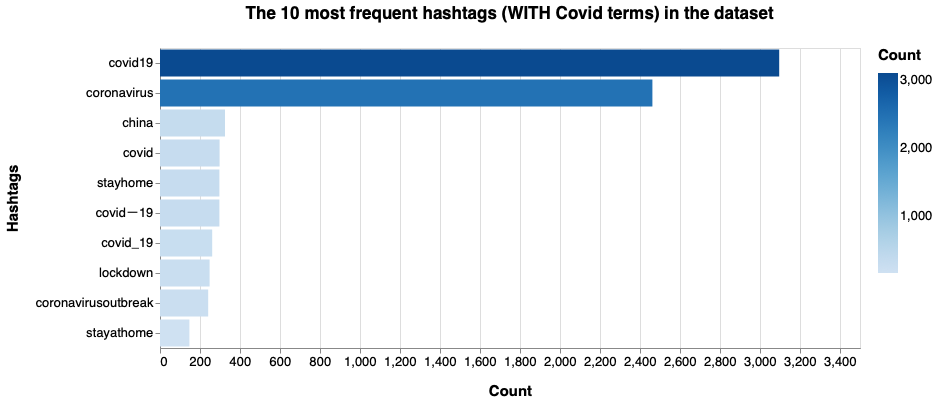

In order to have a better bar chart some hashtags with a similar meaning have been deleted, the result is the following:

In [5]:
l2 = ["covid2019","staysafe","stayathome","covid_19","covidー19","covid","corona","coronavirusoutbreak"]
l3 = [x for x in cmt_list_covid if x not in l2]

clean_out = dict(nltk.FreqDist(l3))


clean_df = pd.DataFrame.from_dict(clean_out, orient='index').reset_index()
clean_df = clean_df.rename(columns={'index':'Hashtags', 0:'Count'})
#print(df)
#alt.renderers.enable('altair_viewer',inline=True)

#range=['#fdecec','#E46060','#ec4545','#e81616','#b91212','#b91212','#5c0909']
clean_chart = alt.Chart(
    clean_df
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Hashtags:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="oranges")),
    tooltip=[
        alt.Tooltip('Hashtags:N', title='Hashtags'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300,
    title = "The 10 most frequent hashtags (WITH Covid terms) in the dataset - CLEAN VERSION"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

clean_chart

alt.Chart(...)

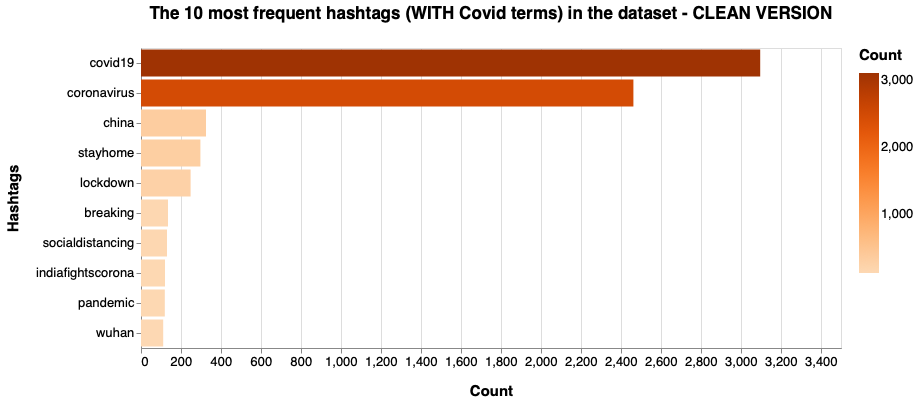

The hashtag word cloud is generated:

In [6]:
mask_covid= np.array(Image.open('grafici/covid.jpg'))

a = ['#332288', '#117733', '#44AA99', '#D55E00', '#AA4499', '#882255',"#D41159"]
my_cmap = ListedColormap(a)

wordcloud_covid = WordCloud(
                    mask=mask_covid,
                    width=mask_covid.shape[1],
                    height=mask_covid.shape[0],
                    background_color ='white', 
                    min_word_length = 4,
                    max_words=550,
                    font_path = 'grafici/GothamMedium.ttf',
                    min_font_size = 14,
                    colormap=my_cmap).generate_from_frequencies(out) 

Plot the hashtag word cloud (WITH terms regarding Covid):

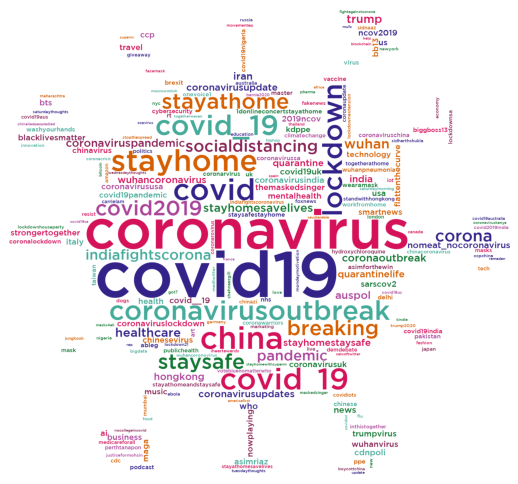

In [7]:
# Plot the word cloud image
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_covid) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

## Terms not regarding Covid

We have also filtered all the hashtags without terms regarding Covid:

In [8]:
index=0
cmt_list = []
stopwords = ["stayathomeandstaysafe","workfromhome","stayhomeandstaysafe","staysafe","stayhomestaysafe","socialdistancing","trumpvirus","lockdown21","wearamask","wuhanpneumonia","covid2019india","wuhan","indiafightscoronavirus","masks","rt","mask","lockdownextension","washyourhands","flattenthecurve","stayathomesavelives","togetherathome","covid19sa","hydroxychloroquine","facemask","wuhancoronavirus","wuhancoronovirus","lockdownhouseparty","stayathome","stayhome","stayhomesavelives","stayhomeandstaysafe","staysafestayhome","1donlineconcertstayathome","coronawarriors","covid19australia","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "coronaviruspandemic"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        if entity['text'] not in stopwords:
            token=entity['text']
            cmt_list.append(token)
        
    index=index+1

We have calculated the frequency distribution, always displayed in the form of a bar chart showing the 15 most frequent hashtags (without Covid words) within the dataset:

In [9]:
out_hashtag = dict(nltk.FreqDist(cmt_list))
#fdist_sorted_hashtag = dict(sorted(fdist_hashtag.items(), key=lambda item: item[1], reverse=True))
#out_hashtag = dict(itertools.islice(fdist_sorted_hashtag.items(), 15))

df_hashtag = pd.DataFrame.from_dict(out_hashtag, orient='index').reset_index()
df_hashtag = df_hashtag.rename(columns={'index':'Hashtags', 0:'Count'})
#alt.renderers.enable('altair_viewer',inline=True)

# range=['#defae8','#d2f8df','#79eb9f','#4ce57f','#1fdf5f','#19b24c','#138539','#0c5926']

c = alt.Chart(
    df_hashtag
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Hashtags:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="greys")),
    tooltip=[
        alt.Tooltip('Hashtags:N', title='Hashtags'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300,
    title = "The 10 most frequent hashtags (WITHOUT Covid terms) in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

c

alt.Chart(...)

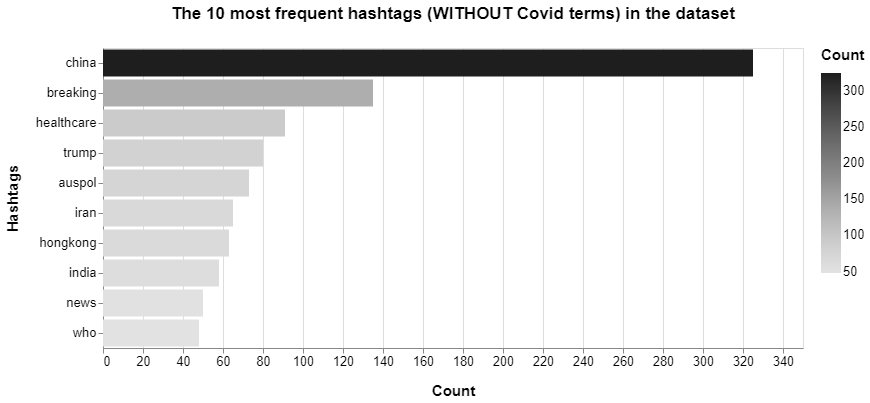

The hashtag word cloud is generated:

In [10]:
mask_nocovid= np.array(Image.open('grafici/speech_bubble.jpg'))

a = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933','#DDCC77', '#CC6677','#882255','#AA4499']
my_cmap = ListedColormap(a)

wordcloud_nocovid = WordCloud(
                        mask=mask_nocovid,
                        width=mask_nocovid.shape[1],
                        height=mask_nocovid.shape[0],
                        background_color ='white', 
                        min_word_length = 4,
                        font_path = 'grafici/GothamMedium.ttf',
                        min_font_size = 14,
                        colormap=my_cmap).generate_from_frequencies(out_hashtag)

Plot the hashtag word cloud (WITHOUT terms regarding Covid):

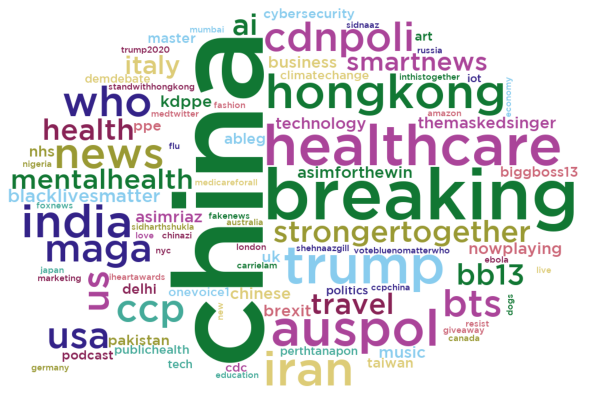

In [11]:
# Plot the word cloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nocovid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 